<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Подготовка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.pipeline import  make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, StratifiedKFold, GridSearchCV, cross_validate, KFold
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, mean_absolute_error, make_scorer, make_scorer
import seaborn as sns
from sklearn.metrics import make_scorer, mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
test_frame = pd.read_csv("/datasets/gold_recovery_test_new.csv", index_col='date', parse_dates=True)
full_frame = pd.read_csv("/datasets/gold_recovery_full_new.csv", index_col='date', parse_dates=True)
train_frame = pd.read_csv("/datasets/gold_recovery_train_new.csv", index_col='date', parse_dates=True)



In [3]:
display(test_frame)

test_frame.info()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,-499.599127,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,-503.587739,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,-520.667442,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882


<class 'pandas.core.frame.DataFrame'>

DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59

Data columns (total 52 columns):

 #   Column                                      Non-Null Count  Dtype  

---  ------                                      --------------  -----  

 0   primary_cleaner.input.sulfate               5286 non-null   float64

 1   primary_cleaner.input.depressant            5285 non-null   float64

 2   primary_cleaner.input.feed_size             5290 non-null   float64

 3   primary_cleaner.input.xanthate              5286 non-null   float64

 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64

 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64

 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64

 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64

 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64

 9   primary_cleaner.state.floatbank8_c_

In [4]:
display(train_frame)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,123.381787,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,120.878188,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,105.666118,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452


In [5]:
display(full_frame)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,123.381787,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,120.878188,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,105.666118,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452


# Рассчитаем эффективность обогащения

In [6]:
C = train_frame['rougher.output.concentrate_au']
F = train_frame['rougher.input.feed_au']
T = train_frame['rougher.output.tail_au']


train_frame['rougher.output.recovery_calc'] = (C * (F-T)) * 100 / (F * (C-T)) 


def mae(target_recovery, calculated_recovery):
    return abs(target_recovery - calculated_recovery).sum() / len(target_recovery)

target_recovery = train_frame['rougher.output.recovery']
calculated_recovery = train_frame['rougher.output.recovery_calc']

mae(target_recovery, calculated_recovery)

1.1131451184435918e-14

Видно, что ошибка достаточно мала - следовательно эффективность обогащения посчитана верно

In [7]:
train_frame.drop('rougher.output.recovery_calc', axis=1, inplace=True)

# Проанализируем признаки недоступные в тестовой выборке

In [8]:
train_frame_cols = train_frame.columns
test_frame_cols = test_frame.columns
difference = train_frame_cols.difference(test_frame_cols)  
counter = 0
print('    Отличающиеся столбцы    ')
for i in difference:
    counter += 1
    print("{}. {}".format(counter,i))
print('\n')
print('Количество столбцов в тренировочной выборке:', len(train_frame_cols))
print('Количество столбцов в тестовой выборке:', len(test_frame_cols))
print('Общее количество отличающихся столбцов: ', counter)

    Отличающиеся столбцы    

1. final.output.concentrate_ag

2. final.output.concentrate_au

3. final.output.concentrate_pb

4. final.output.concentrate_sol

5. final.output.recovery

6. final.output.tail_ag

7. final.output.tail_au

8. final.output.tail_pb

9. final.output.tail_sol

10. primary_cleaner.output.concentrate_ag

11. primary_cleaner.output.concentrate_au

12. primary_cleaner.output.concentrate_pb

13. primary_cleaner.output.concentrate_sol

14. primary_cleaner.output.tail_ag

15. primary_cleaner.output.tail_au

16. primary_cleaner.output.tail_pb

17. primary_cleaner.output.tail_sol

18. rougher.calculation.au_pb_ratio

19. rougher.calculation.floatbank10_sulfate_to_au_feed

20. rougher.calculation.floatbank11_sulfate_to_au_feed

21. rougher.calculation.sulfate_to_au_concentrate

22. rougher.output.concentrate_ag

23. rougher.output.concentrate_au

24. rougher.output.concentrate_pb

25. rougher.output.concentrate_sol

26. rougher.output.recovery

27. rougher.output.tail_ag

Видим, что в тестовой выборке отсутствуют признаки final.output, primary_cleaner.output, rougher.output, secondary_cleaner.output.

Данные в этих столбцах описывают текущее состояние этапа и расчетные характеристики

# Проведем предобработку данных

In [9]:
train_frame = train_frame[test_frame.columns]

train_frame_cols = train_frame.columns
test_frame_cols = test_frame.columns
difference = train_frame_cols.difference(test_frame_cols)  
counter = 0
print('    Отличающиеся столбцы    ')
for i in difference:
    counter += 1
    print("{}. {}".format(counter,i))
print('\n')
print('Количество столбцов в тренировочной выборке:', len(train_frame_cols))
print('Количество столбцов в тестовой выборке:', len(test_frame_cols))
print('Общее количество отличающихся столбцов: ', counter)

    Отличающиеся столбцы    





Количество столбцов в тренировочной выборке: 52

Количество столбцов в тестовой выборке: 52

Общее количество отличающихся столбцов:  0


Проверим наборы данных на пропуски

In [10]:
print("Пропущенных значений: ", train_frame.isna().sum().sum())

print("Пропущенных значений: ", test_frame.isna().sum().sum())

Пропущенных значений:  1705

Пропущенных значений:  90


Пропуски найдены, удалим их и приступим к следующему этапу

In [11]:
train_frame.dropna(inplace=True)

test_frame.dropna(inplace=True)

print("Пропущенных значений: ", train_frame.isna().sum().sum())

print("Пропущенных значений: ", test_frame.isna().sum().sum())

Пропущенных значений:  0

Пропущенных значений:  0


## Анализ данных

# Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

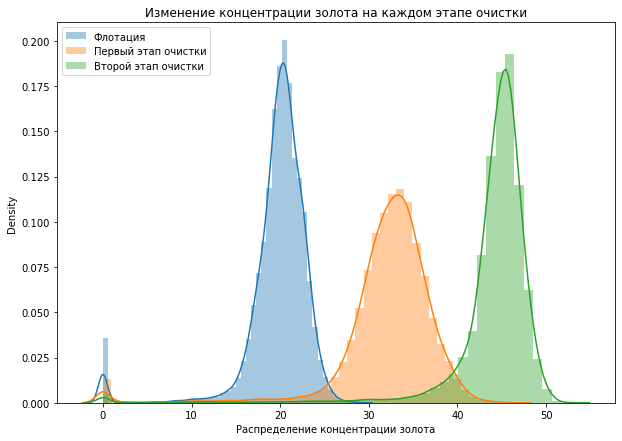

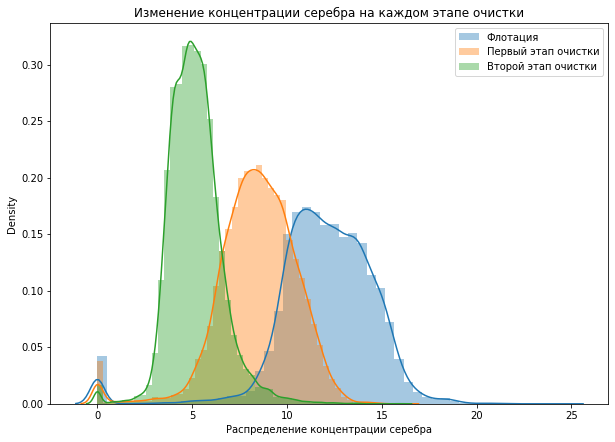

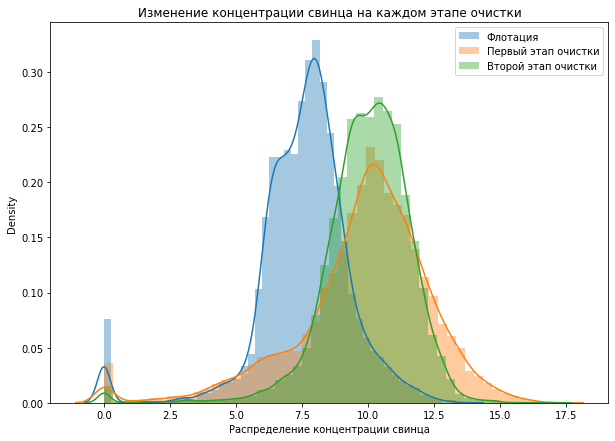

In [12]:
metals = [('au','золота'),('ag','серебра'),('pb','свинца')]

stages = [('rougher.output.concentrate_', 'Флотация'), 
               ('primary_cleaner.output.concentrate_', 'Первый этап очистки'), 
               ('final.output.concentrate_', 'Второй этап очистки')]


for i in metals:
    plt.figure(figsize=(10,7))
    for s in stages:
        axes = sns.distplot(full_frame[s[0] + i[0]], label=s[1])
        plt.legend()
        names = axes.set(xlabel='Распределение концeнтрации ' + i[1], 
                   title='Изменение концентрации ' + i[1] + ' на каждом этапе очистки')
    plt.show()

Из графиков видно, что концентрация золота с каждым этапом очистки только растет. 

Концентрация серебра к последнему этапу очистки начинает снижаться. 

Концентрация свинца к второму этапу очистки осталась практически на том же уровне.

# Сравним распределения размеров гранул сырья на обучающей и тестовой выборках

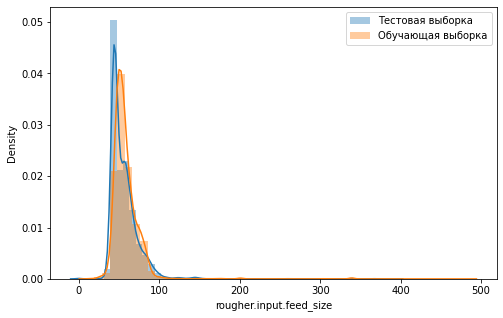

In [13]:
plt.figure(figsize=(8,5))
sns.distplot(test_frame['rougher.input.feed_size'], label='Тестовая выборка')
sns.distplot(train_frame['rougher.input.feed_size'], label='Обучающая выборка')
plt.legend()

Видим, что распределение размеров гранул сырья на графиках практически не отличаются

# Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

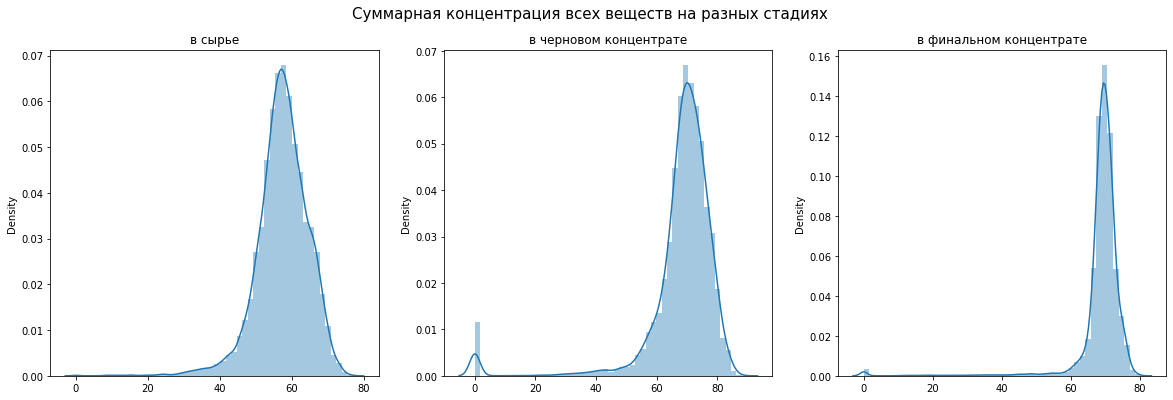

In [14]:
concentration_stages = [('rougher.input.feed_', 'в сырье'),
                        ('rougher.output.concentrate_', 'в черновом концентрате'), 
                        ('final.output.concentrate_', 'в финальном концентрате')]


fig, axes = plt.subplots(1, len(concentration_stages), figsize=(20, 6))
fig.suptitle('Суммарная концентрация всех веществ на разных стадиях', fontsize=15)


for s, ax in zip(concentration_stages, axes):
    ax.set_title(s[1])
    full_concentration =  full_frame[s[0]+ 'ag'] + full_frame[s[0]+ 'au'] + full_frame[s[0]+ 'pb'] + full_frame[s[0]+ 'sol']

    sns.distplot(full_concentration, ax=ax)   

plt.show()

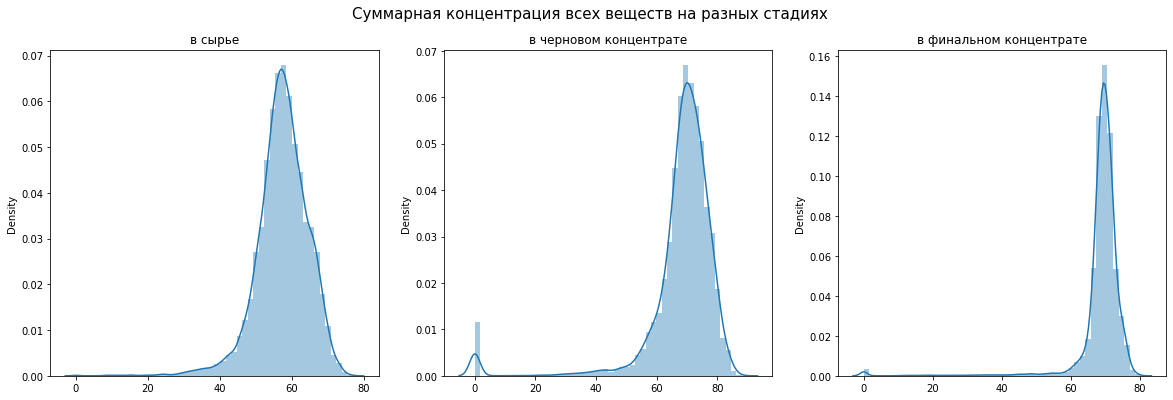

In [15]:


train_frame = train_frame[train_frame['rougher.input.feed_ag']>1]
train_frame = train_frame[train_frame['rougher.input.feed_au']>1]
train_frame = train_frame[train_frame['rougher.input.feed_pb']>1]



fig, axes = plt.subplots(1, len(concentration_stages), figsize=(20, 6))
fig.suptitle('Суммарная концентрация всех веществ на разных стадиях', fontsize=15)


for s, ax in zip(concentration_stages, axes):
    ax.set_title(s[1])
    full_concentration =  full_frame[s[0]+ 'ag'] + full_frame[s[0]+ 'au'] + full_frame[s[0]+ 'pb'] + full_frame[s[0]+ 'sol']

    sns.distplot(full_concentration, ax=ax)   

plt.show()

## Модель

# Напишем функцию для вычисления итоговой sMAPE

In [16]:
def smape(y_target, y_pred):
    return ((1/len(y_target)) * np.sum(2 * np.abs(y_target - y_pred) / (np.abs(y_target) + np.abs(y_pred)))) * 100

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> `smape` расчитана верно.</font>

Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке

In [17]:
# подготовка признаков для final.output.recovery



x_train_rougher = train_frame
x_test_rougher = test_frame
y_train_rougher = full_frame.loc[x_train_rougher.index, 'rougher.output.recovery']
y_test_rougher = full_frame.loc[x_test_rougher.index,'final.output.recovery']

x_train_final = train_frame
x_test_final = test_frame
y_train_final = full_frame.loc[x_train_final.index, 'final.output.recovery']
y_test_final = full_frame.loc[x_test_final.index, 'final.output.recovery']

print(x_train_rougher.shape, x_train_final.shape)
print(x_test_rougher.shape, x_test_final.shape)
print(y_train_rougher.shape, y_train_final.shape)
print(y_test_rougher.shape, y_test_final.shape)


(12580, 52) (12580, 52)

(5229, 52) (5229, 52)

(12580,) (12580,)

(5229,) (5229,)


In [18]:
# выбираем три модели и определяем параметры для GridSearchCV

from numpy.random import RandomState
state = RandomState(12345)

pipe = Pipeline([
    #('imp', SimpleImputer(missing_values=np.nan)),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=state))
])

params = [
    {
        #'imp__strategy': ['mean', 'median'],
        'model': [RandomForestRegressor(n_estimators=10, random_state=state)],
        'model__max_features': np.linspace(0.1, 1, 10)
    }, {
        #'imp__strategy': ['mean', 'median'],
        'model': [LinearRegression()]
    }, {
        #'imp__strategy': ['mean', 'median'],
        'model': [linear_model.Lasso(random_state=state)],
        'model__alpha': np.logspace(-3, 1, 10)
    }
]


In [19]:
# подготовим метрику smape и проведем кроссвалидацию с помощью KFold

smape_score = make_scorer(smape, greater_is_better=False)


cv = KFold(n_splits=5, shuffle=False)
grid_rougher = GridSearchCV(pipe, param_grid=params, cv=cv, n_jobs=-1, scoring=smape_score)
grid_rougher.fit(x_train_rougher, y_train_rougher)

print('Лучшие параметры:', grid_rougher.best_params_)
print('Лучший sMAPE:', -grid_rougher.best_score_)

Лучшие параметры: {'model': Lasso(alpha=1.2915496650148828,

      random_state=RandomState(MT19937) at 0x7FDAFA058340), 'model__alpha': 1.2915496650148828}

Лучший sMAPE: 9.824577335321715


In [20]:
# поиск лучших параметров для final 
grid_final = GridSearchCV(pipe, param_grid=params, cv=cv, n_jobs=-1, scoring=smape_score)
grid_final.fit(x_train_final, y_train_final)

print('Лучшие параметры:', grid_final.best_params_)
print('Лучший sMAPE:', -grid_final.best_score_)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111.58189508621581, tolerance: 84.91510074052843

  model = cd_fast.enet_coordinate_descent(


Лучшие параметры: {'model': Lasso(alpha=0.46415888336127775,

      random_state=RandomState(MT19937) at 0x7FDAFA058340), 'model__alpha': 0.46415888336127775}

Лучший sMAPE: 9.233493631473959


In [21]:
# модель с лучшими параметрами для тестовой выборки rougher
pipe_rougher = grid_rougher.best_estimator_

pipe_rougher.fit(x_train_rougher, y_train_rougher)
y_pred = pipe_rougher.predict(x_test_rougher)

smape_rougher = smape(full_frame.loc[x_test_rougher.index, 'rougher.output.recovery'], y_pred)
print(smape_rougher)

8.39121290534835


In [22]:
# модель с лучшими параметрами для тестовой выборки final
pipe_final = grid_final.best_estimator_
    
pipe_final.fit(x_train_final, y_train_final)
y_pred_final = pipe_final.predict(x_test_final)

smape_final = smape(full_frame.loc[x_test_rougher.index, 'final.output.recovery'],y_pred_final)
print(smape_final)

8.305031319778482


In [23]:
# итоговый sMAPE 
final_smape = 0.25*smape_rougher + 0.75*smape_final
print(final_smape)

8.32657671617095


In [26]:
y_test_rougher = full_frame.loc[x_test_rougher.index, 'rougher.output.recovery']
y_test_final = full_frame.loc[x_test_rougher.index, 'final.output.recovery']

rougher_median = pd.Series(y_train_rougher.median(), index=y_test_rougher.index)
final_median = pd.Series(y_train_final.median(), index=y_test_final.index)

total = (smape(rougher_median, y_test_rougher)*0.25) + (smape(final_median, y_test_final)* 0.75)
print(total)

9.080836124446476


## Вывод

Шаг 1. Знакомство и подготовка данных

Ознакомился с данными, проверил общую информацию о датасете. Рассчитал эффективность обогащения и провел предобработку данных. 


Шаг 2. Анализ данных

На этом этапе я проверил, как меняется концентрация металлов на различных этапах очистки, сравнил распределения размеров гранул сырья на обучающей и тестовой выборках, исследовал суммарную концентрацию всех веществ на разных стадиях


Шаг 3. Построение модели

Написал функцию для вычисления итоговой sMAPE, с помощью GridSearchCV подобрал наилучшую модель и наилучшие параметры.

Итоговый sMAPE : 8.31